In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Cleaned text:  i love painting and reading they help me relax and make me happy it helps me reflect and respond in color and texture both activities require focus and attention
Text after word tokenization:  ['i', 'love', 'painting', 'and', 'reading', 'they', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'it', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'both', 'activities', 'require', 'focus', 'and', 'attention']
Text after sentence tokenization:  ['I love painting and reading.', 'They help me relax and make me happy.', 'It helps me reflect and respond in color and texture.', 'Both activities require focus and attention.']
Text after tokenization done using split() ['I', 'love', 'painting', 'and', 'reading.', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy.', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture.', 'Both', 'activities', 'require', 'focus', 'and', 'attention.']
Text after tokenization done us

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

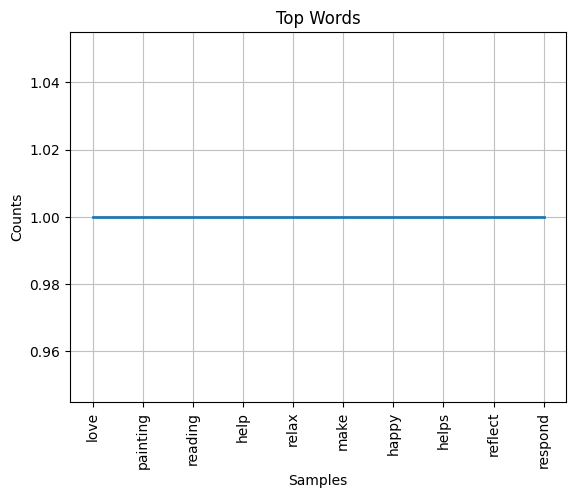

In [2]:
text='I love painting and reading. They help me relax and make me happy. It helps me reflect and respond in color and texture. Both activities require focus and attention.'
text_lower=text.lower()
text_clean=text_lower.translate(str.maketrans('', '', string.punctuation))
print("Cleaned text: ", text_clean)

word_tokens=word_tokenize(text_clean)
sent_tokens=sent_tokenize(text)

print("Text after word tokenization: ", word_tokens)
print("Text after sentence tokenization: ", sent_tokens)

sent_split=text.split()
print("Text after tokenization done using split()", sent_split)

sent_split=text.split()
print("Text after tokenization done using split()", sent_split)

stop_words = set(stopwords.words('english'))
filter= [i for i in word_tokens if i.lower() not in stop_words]
print("Filtered Words:", filter)

fd = FreqDist(filter)
fd.plot(10, title="Top Words")

In [3]:
only_alpha = re.findall(r'\b[a-zA-Z]+\b', text)
print(only_alpha)
ps=PorterStemmer()
stemmed=[ps.stem(i) for i in filter]
print("Stemmed words: ", stemmed)

l=WordNetLemmatizer()
lemmatized=[l.lemmatize(i.lower()) for i in filter]
print("Lemmatized words: ", lemmatized)

['I', 'love', 'painting', 'and', 'reading', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'Both', 'activities', 'require', 'focus', 'and', 'attention']
Stemmed words:  ['love', 'paint', 'read', 'help', 'relax', 'make', 'happi', 'help', 'reflect', 'respond', 'color', 'textur', 'activ', 'requir', 'focu', 'attent']
Lemmatized words:  ['love', 'painting', 'reading', 'help', 'relax', 'make', 'happy', 'help', 'reflect', 'respond', 'color', 'texture', 'activity', 'require', 'focus', 'attention']


In [4]:
long_words = re.findall(r'\b\w{6,}\b', text)
print("Words with more than 5 letters:", long_words)

numbers = re.findall(r'\d+', text)
print("Numbers in the text:", numbers)

capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', text)
print("Capitalized words:", capitalized_words)

Words with more than 5 letters: ['painting', 'reading', 'reflect', 'respond', 'texture', 'activities', 'require', 'attention']
Numbers in the text: []
Capitalized words: ['I', 'They', 'It', 'Both']


In [5]:
words_only = re.findall(r'[a-zA-Z]+', text)
print("Words containing only alphabets:", words_only)

vowel_words = [i for i in words_only if i[0].lower() in 'aeiou']
print("Words starting with a vowel:", vowel_words)

Words containing only alphabets: ['I', 'love', 'painting', 'and', 'reading', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'Both', 'activities', 'require', 'focus', 'and', 'attention']
Words starting with a vowel: ['I', 'and', 'and', 'It', 'and', 'in', 'and', 'activities', 'and', 'attention']


In [6]:
text = re.sub(r"[^\w\s'-]", "", text)

text = re.sub(r'\b([a-zA-Z]+(?:-[a-zA-Z]+)+)\b', r'\1', text)

text = re.sub(r'(\d+\.\d+|\d+)', r' \1 ',text)

tokens = text.split()
print("Tokens:", tokens)

Tokens: ['I', 'love', 'painting', 'and', 'reading', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'Both', 'activities', 'require', 'focus', 'and', 'attention']


In [7]:
text1= "Contact me at xyz@example.com or call +91 8887770999"

text1 = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '<EMAIL>', text1)

text1 = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '<URL>', text1)

text1 = re.sub(r'\b(\+?\d{1,2}\s?)?(\(?\d{3}\)?[-.\s]?)?(\d{3})[-.\s]?(\d{4})\b', '<PHONE>', text1)

print("\nModified Text:", text1)


Modified Text: Contact me at <EMAIL> or call +<PHONE>
